In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
df.shape

(4340, 8)

In [7]:
df._get_numeric_data().columns

Index(['year', 'selling_price', 'km_driven'], dtype='object')

In [8]:
print(df["seller_type"].unique())
print(df["fuel"].unique())
print(df["owner"].unique())
print(df["transmission"].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Manual' 'Automatic']


In [9]:
##check missing value
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [10]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [11]:
df=df.drop(["name"], axis=1)

In [12]:
df["currentYear"]=2021

In [13]:
df["YearOld"]=df["currentYear"]-df["year"]

In [14]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,currentYear,YearOld
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2021,14
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2021,14
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2021,9
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2021,4
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2021,7
...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,2021,7
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,2021,7
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,2021,12
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,2021,5


In [15]:
df=df.drop(["year", "currentYear"], axis=1)

In [16]:
df=pd.get_dummies(df, drop_first=True)

In [17]:
df.columns

Index(['selling_price', 'km_driven', 'YearOld', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [18]:
df.shape

(4340, 14)

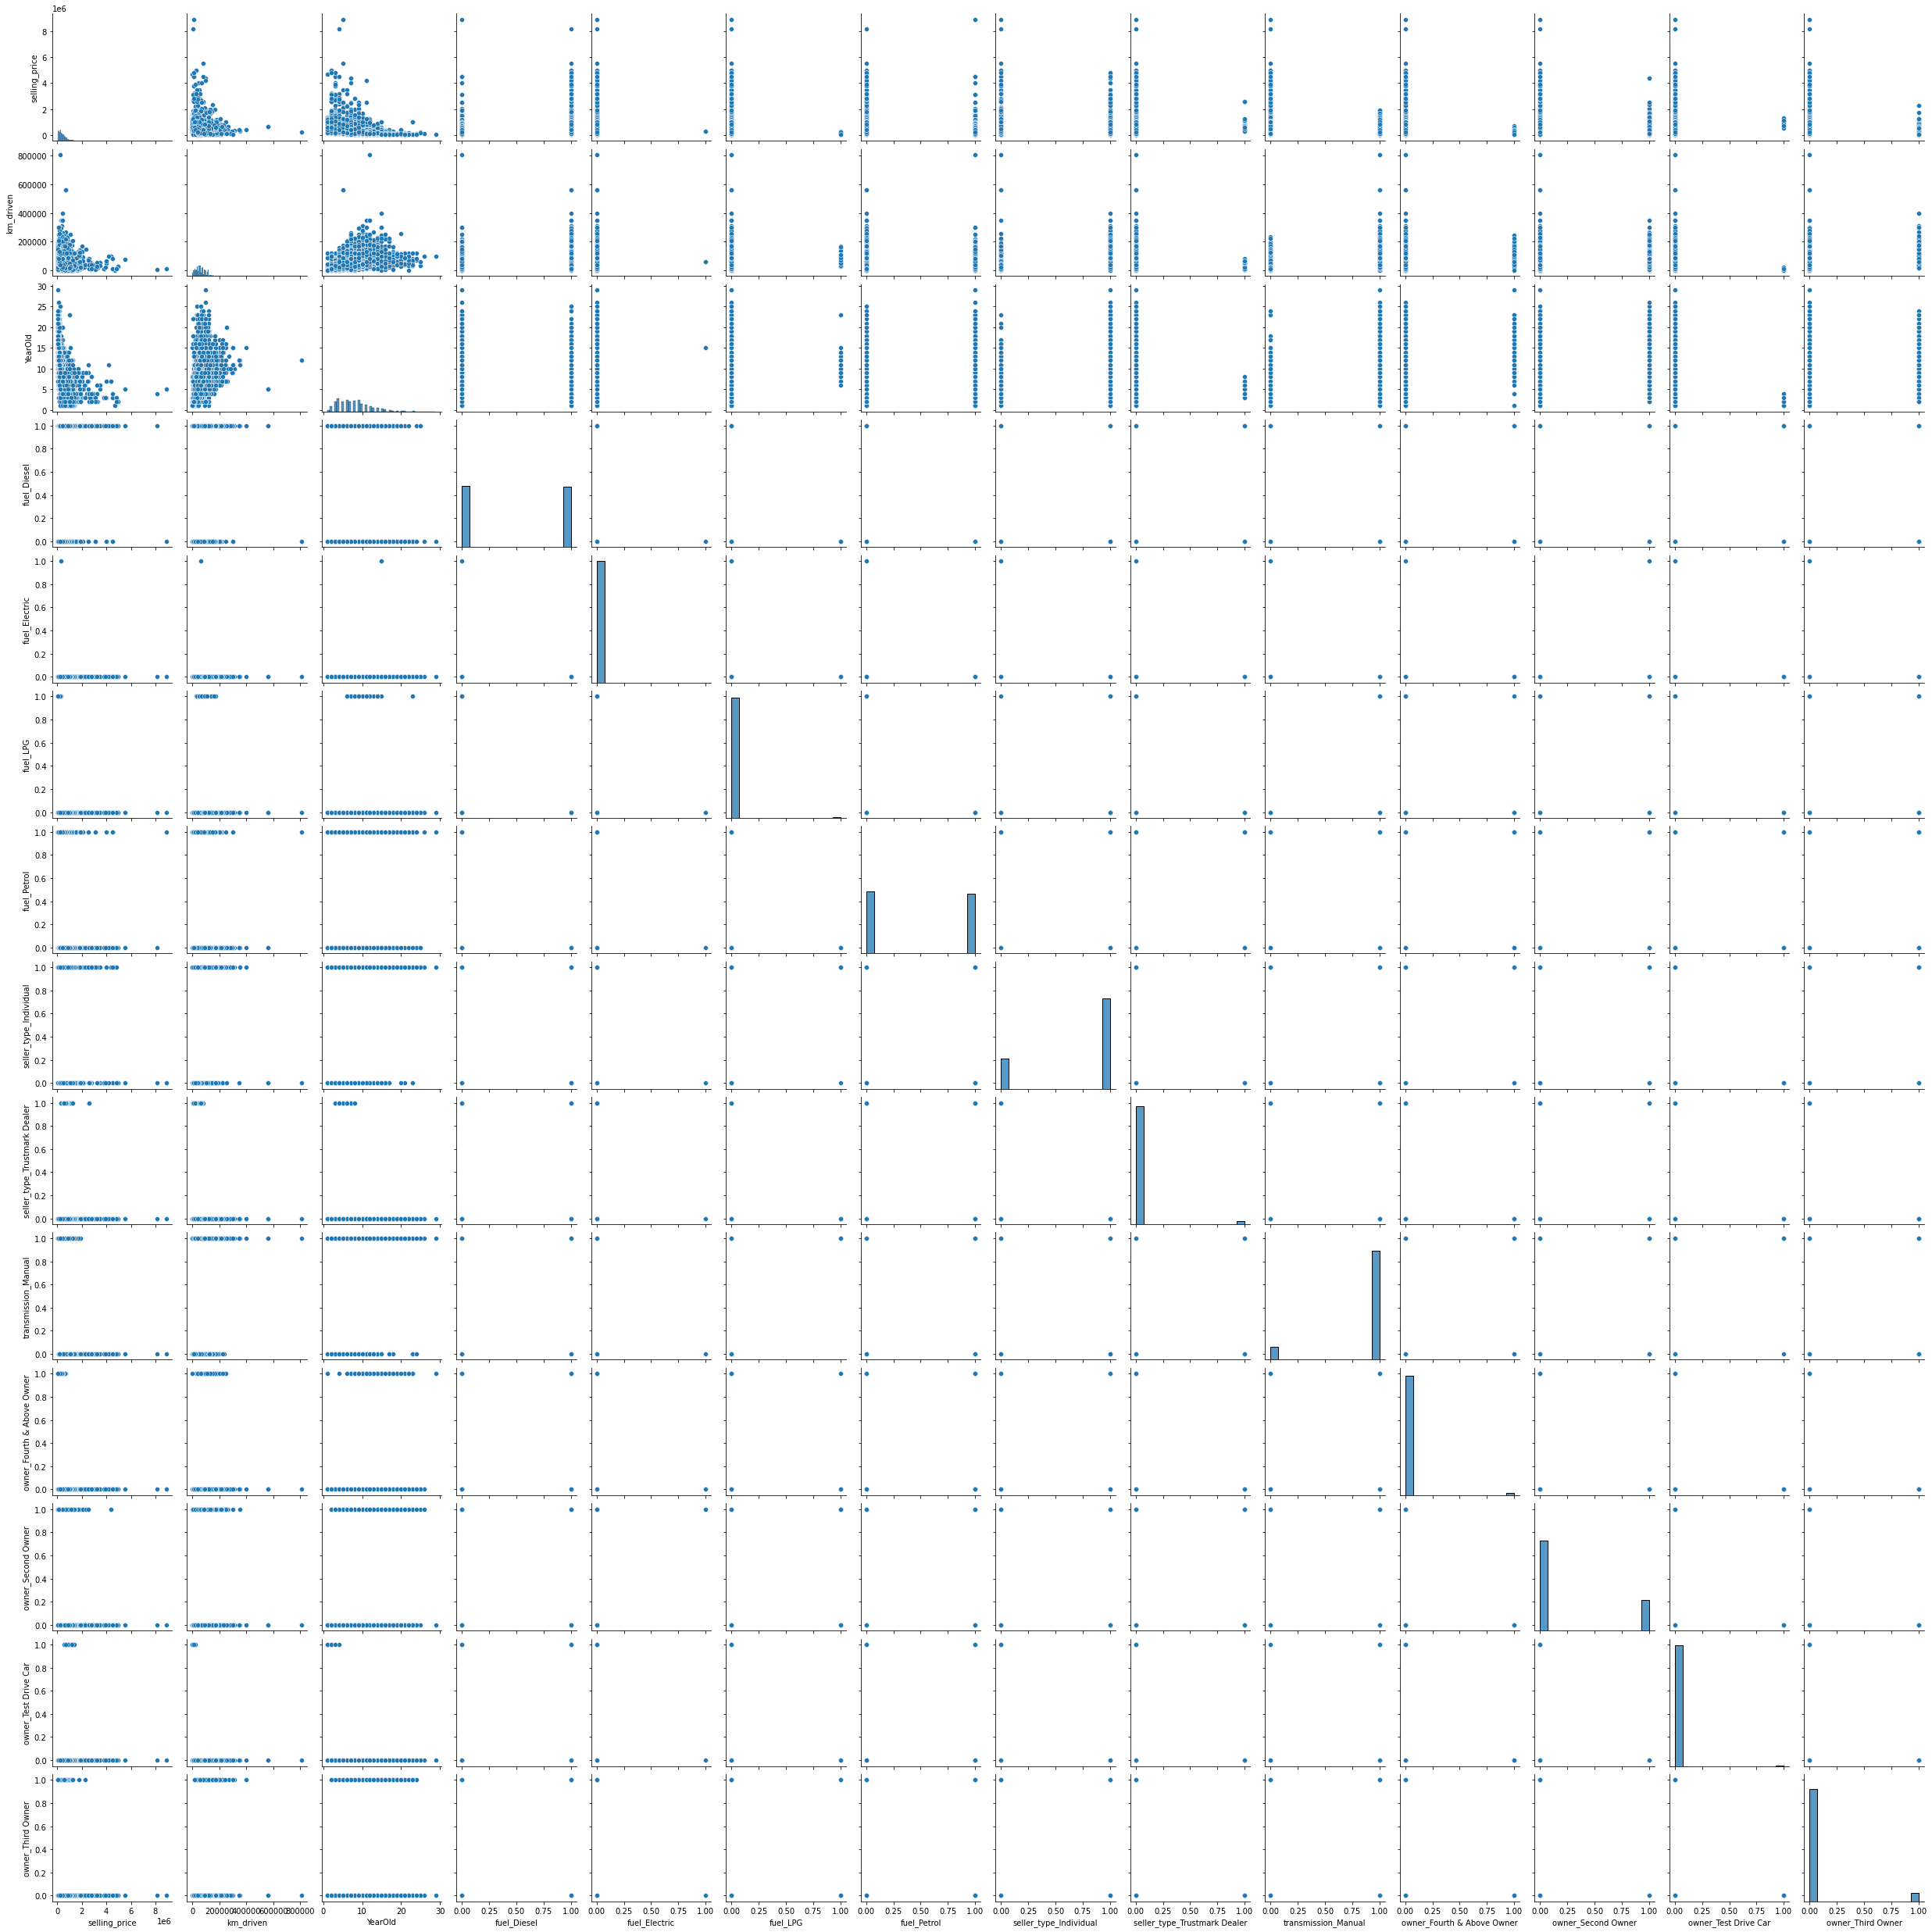

In [19]:
sns.pairplot(df)

<AxesSubplot:>

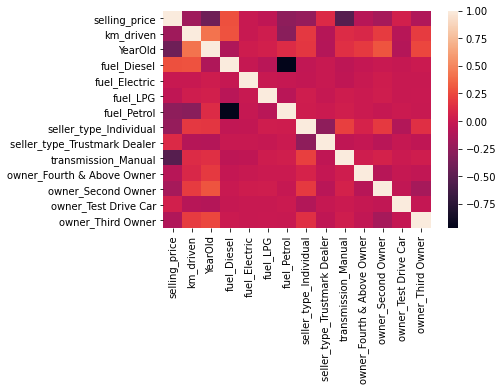

In [20]:
sns.heatmap(df.corr())

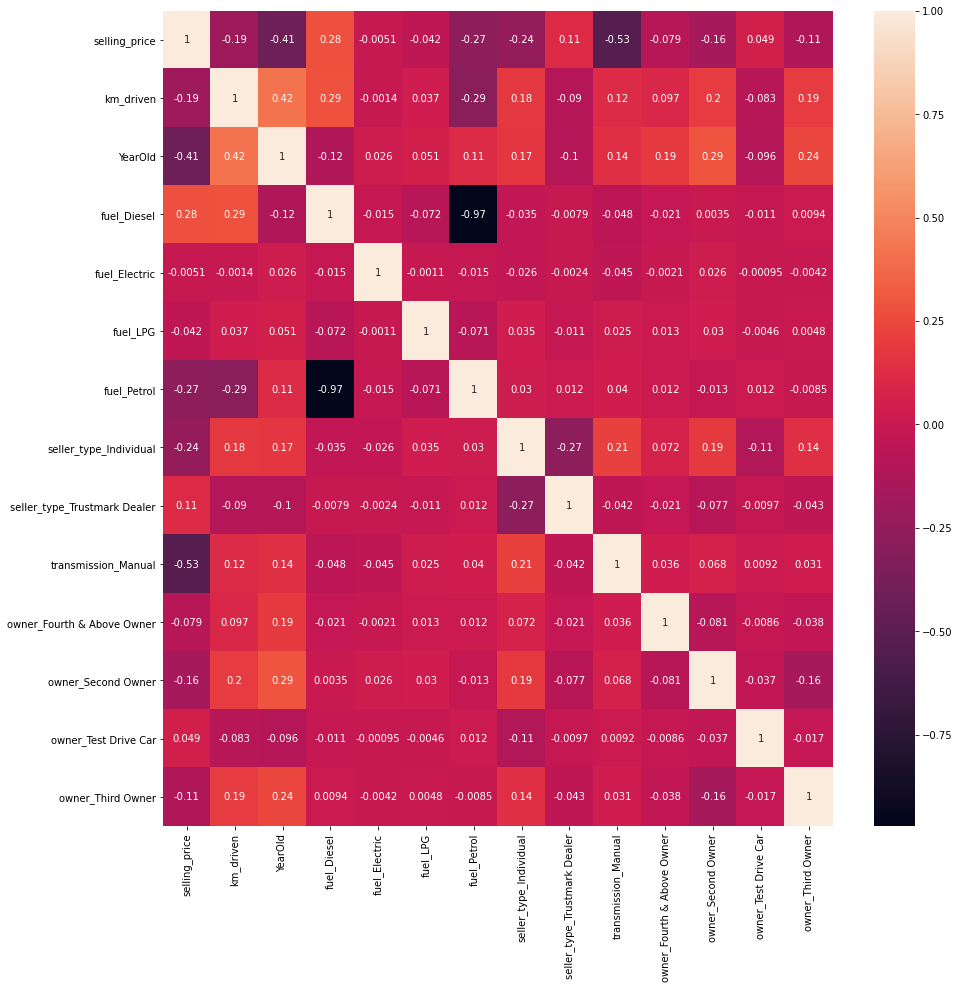

In [21]:
CM=df.corr()
MostCoRE=CM.index
plt.figure(figsize=(15,15))
CoG=sns.heatmap(df[MostCoRE].corr(), annot=True)

In [22]:
df['fuel_Electric'].value_counts()

0    4339
1       1
Name: fuel_Electric, dtype: int64

In [23]:
df['owner_Test Drive Car'].value_counts()

0    4323
1      17
Name: owner_Test Drive Car, dtype: int64

In [43]:
df.columns

Index(['selling_price', 'km_driven', 'YearOld', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [45]:
df.columns=['selling_price', 'km_driven', 'YearOld', 'fuel_Diesel', 'fuel_Electric',
            'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark_Dealer', 'transmission_Manual',
       'owner_Fourth_&_Above_Owner', 'owner_Second_Owner',
       'owner_Test_Drive_Car', 'owner_Third_Owner']

In [46]:
X=df.drop(["selling_price"], axis=1)
Y=df["selling_price"]

In [47]:
from sklearn.ensemble import ExtraTreesRegressor

model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [48]:
print(model.feature_importances_)

[2.43863269e-01 2.49599718e-01 1.30467371e-01 3.02173306e-05
 2.47139483e-05 2.13745162e-04 4.70580002e-02 8.31484876e-03
 2.92827843e-01 7.10817872e-04 2.16243786e-02 7.36737102e-04
 4.52834010e-03]


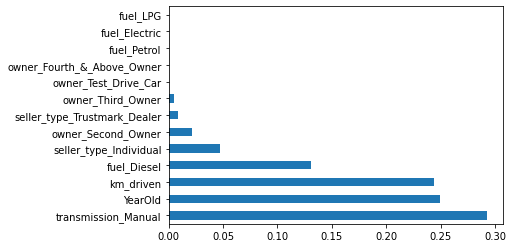

In [49]:
importantFeatures=pd.Series(model.feature_importances_, index=X.columns)
importantFeatures.nlargest(13).plot(kind='barh')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
XTrain,XTest, YTrain,YTest=train_test_split(X,Y, test_size=0.2)

In [51]:
XTrain.shape

(3472, 13)

In [52]:
from sklearn.ensemble import RandomForestRegressor
Rf=RandomForestRegressor()

In [53]:
#hyper parameter

n_estimators=[int(x) for x in np.linspace(start= 100, stop=1600, num=16)]

max_features=['auto', 'sqrt']

max_depth=[int(x) for x in np.linspace(5,30, num=6)]

min_samples_split=[2,5,10,15,100,200]

min_samples_leaf=[1,2,3,5,10,20]

In [54]:
from sklearn.model_selection import RandomizedSearchCV



In [55]:
ranGrid={'n_estimators':n_estimators,
        'max_features':max_features,
        'max_depth':max_depth,
        'min_samples_split':min_samples_split,
         'min_samples_leaf':min_samples_leaf
        }

print(ranGrid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100, 200], 'min_samples_leaf': [1, 2, 3, 5, 10, 20]}


In [56]:
rf_random=RandomizedSearchCV(estimator=Rf, param_distributions=ranGrid,scoring='neg_mean_squared_error', n_iter=15, cv=5, verbose=2, random_state=42,n_jobs=1)

In [57]:
rf_random.fit(XTrain,YTrain)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=200, n_estimators=1300; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=200, n_estimators=1300; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=200, n_estimators=1300; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=200, n_estimators=1300; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=200, n_estimators=1300; total time=   1.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1500; total time=   3.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1500; total time=   3.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_es

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=200, n_estimators=500; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=200, n_estimators=500; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=200, n_estimators=500; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.6s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 10,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              200],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500,
                                                         1600]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
RFpredict=rf_random.predict(XTest)

In [59]:
len(RFpredict)

868

c:\users\girij\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

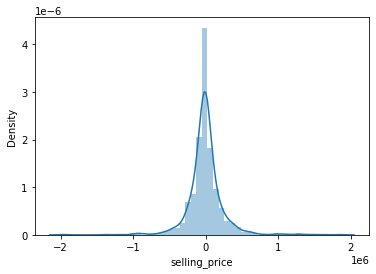

In [60]:
sns.distplot(YTest-RFpredict)

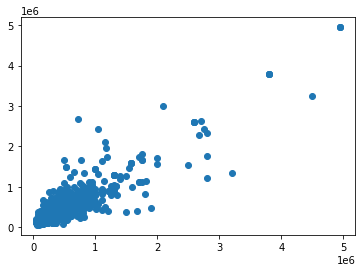

In [61]:
plt.scatter(YTest,RFpredict)

In [62]:
import pickle

file=open("Rfmodel.pkl", 'wb')

pickle.dump(rf_random, file)


In [63]:
XTrain.columns

Index(['km_driven', 'YearOld', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark_Dealer',
       'transmission_Manual', 'owner_Fourth_&_Above_Owner',
       'owner_Second_Owner', 'owner_Test_Drive_Car', 'owner_Third_Owner'],
      dtype='object')

In [65]:
XTest.columns

Index(['km_driven', 'YearOld', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark_Dealer',
       'transmission_Manual', 'owner_Fourth_&_Above_Owner',
       'owner_Second_Owner', 'owner_Test_Drive_Car', 'owner_Third_Owner'],
      dtype='object')